# 보험금 청구액 분석

## 1.환경준비

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

### 2) 데이터 로딩

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/insurance.csv'
data = pd.read_csv(path)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


* 변수설명
    * **age**: age of primary beneficiary
    * **sex**: insurance contractor gender, female, male
    * **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
    * **children**: Number of children covered by health insurance / Number of dependents
    * **smoker**: Smoking
    * **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
    * **charges**: Individual medical costs billed by health insurance (target)


* 데이터의 크기를 살펴봅시다.

In [3]:
data.shape

(1338, 7)

## 2.개별 변수 분석하기

* 파악해야 할 부분
    * 변수의 의미
    * 분포
        * 대체로 데이터가 모여 있는 부분
        * 데이터가 희박한 부분
        * 특이한 부분
    * 비즈니스 파악하기
        * 분포로 부터 비즈니스 이해하기
    * 추가 분석하고 싶은 내용

### (1) 수치형 변수

* 그래프 : histogram, kdeplot, boxplot
* 기초통계량 : .describe()

#### 1) age

In [4]:
data[['age']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0


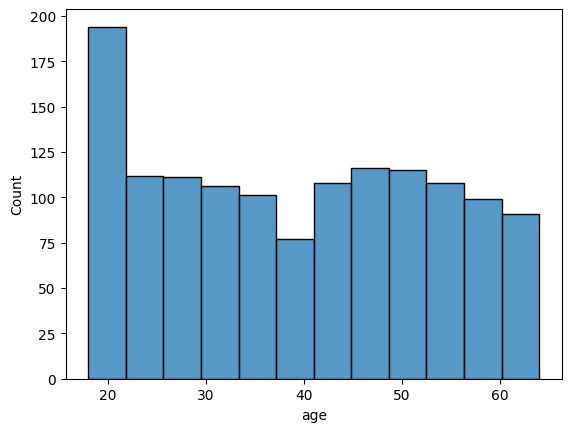

In [5]:
sns.histplot(data['age'])
plt.show()

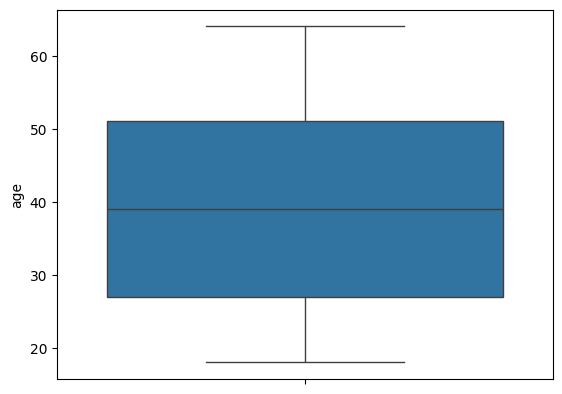

In [6]:
sns.boxplot(data['age'], vert=True)
plt.show()

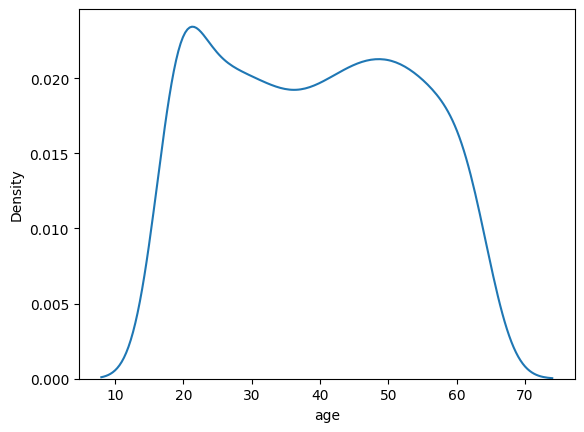

In [7]:
sns.kdeplot(data['age'])
plt.show()

#### 2) bmi

In [8]:
data[['bmi']].describe().T

,count,mean,std,min,25%,50%,75%,max
bmi,1338.0,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13


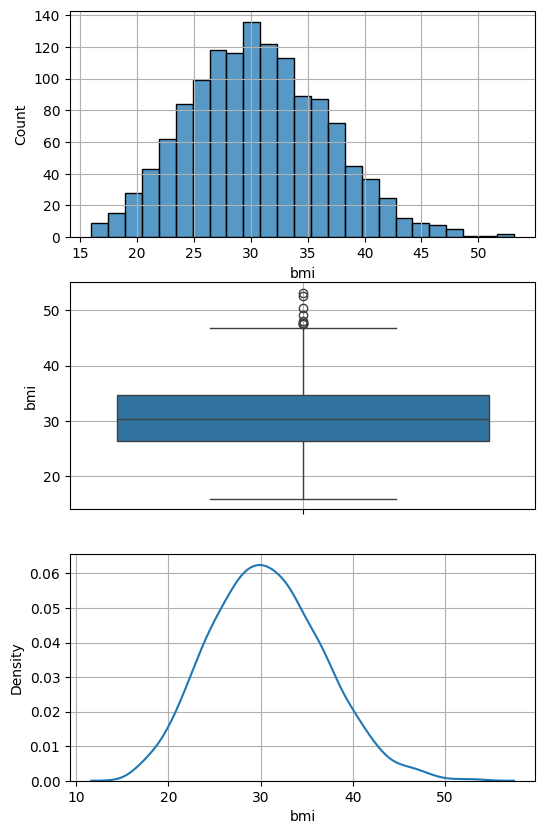

In [20]:
plt.figure(figsize=(6, 10))

plt.subplot(3, 1, 1)
sns.histplot(data['bmi'])
plt.grid()

plt.subplot(3, 1, 2)
sns.boxplot(data['bmi'])
plt.grid()

plt.subplot(3, 1, 3)
sns.kdeplot(data['bmi'])
plt.grid()

plt.show()

#### 3) children

In [9]:
data[['children']].describe().T

,count,mean,std,min,25%,50%,75%,max
children,1338.0,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0


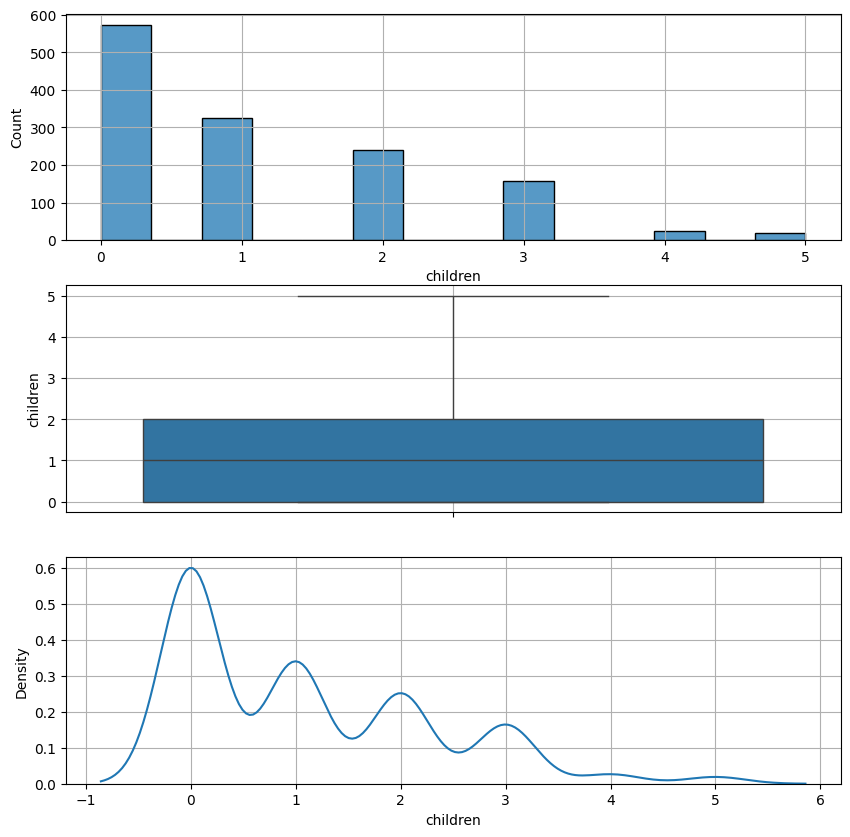

In [10]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
sns.histplot(data['children'])
plt.grid()

plt.subplot(3, 1, 2)
sns.boxplot(data['children'])
plt.grid()

plt.subplot(3, 1, 3)
sns.kdeplot(data['children'])
plt.grid()

plt.show()

#### 4) charges (Target)

In [11]:
data[['charges']].describe().T

,count,mean,std,min,25%,50%,75%,max
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


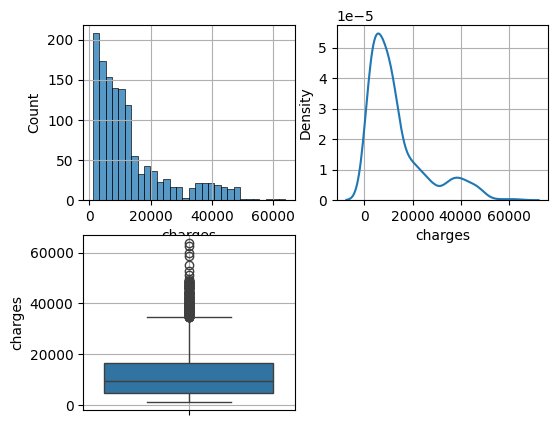

In [12]:
plt.figure(figsize=(6, 5))

plt.subplot(2, 2, 1)
sns.histplot(data['charges'])
plt.grid()

plt.subplot(2, 2, 2)
sns.kdeplot(data['charges'])
plt.grid()

plt.subplot(2, 2, 3)
sns.boxplot(data['charges'])
plt.grid()

plt.show()

### (2) 범주형 변수

* 그래프 : bar plot (sns.countplot)
* 기초통계량 : .value_counts()

In [36]:
def data_bar_value(data, feature):
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    sns.countplot(data[feature])
    plt.grid()
    
    plt.subplot(2, 1, 2)
    sns.barplot(data[feature])
    plt.grid()
    
    plt.show()
    

In [21]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### 1) sex

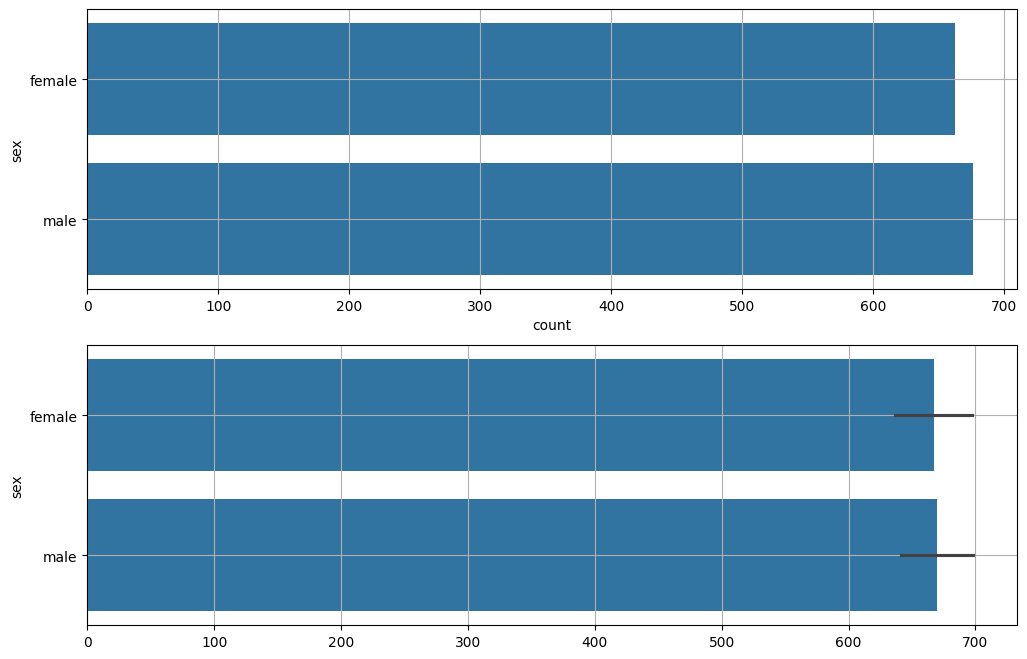

In [37]:
data_bar_value(data, 'sex')

In [24]:
data[['sex']].describe().T

,count,unique,top,freq
sex,1338,2,male,676


#### 2) smoker

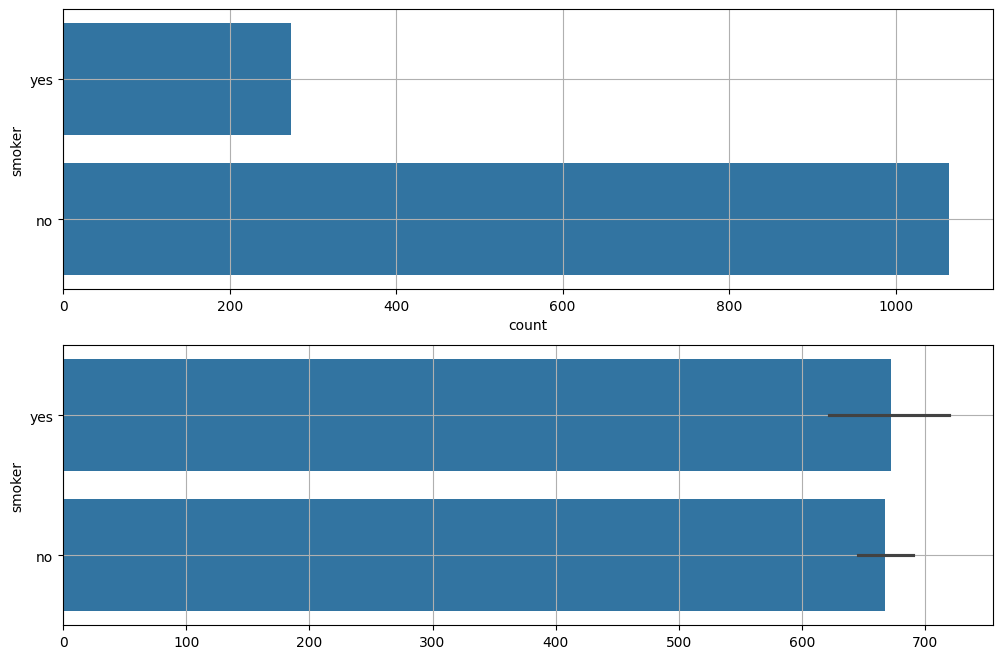

In [38]:
data_bar_value(data, 'smoker')

In [29]:
data[['smoker']].describe().T

,count,unique,top,freq
smoker,1338,2,no,1064


#### 3) region

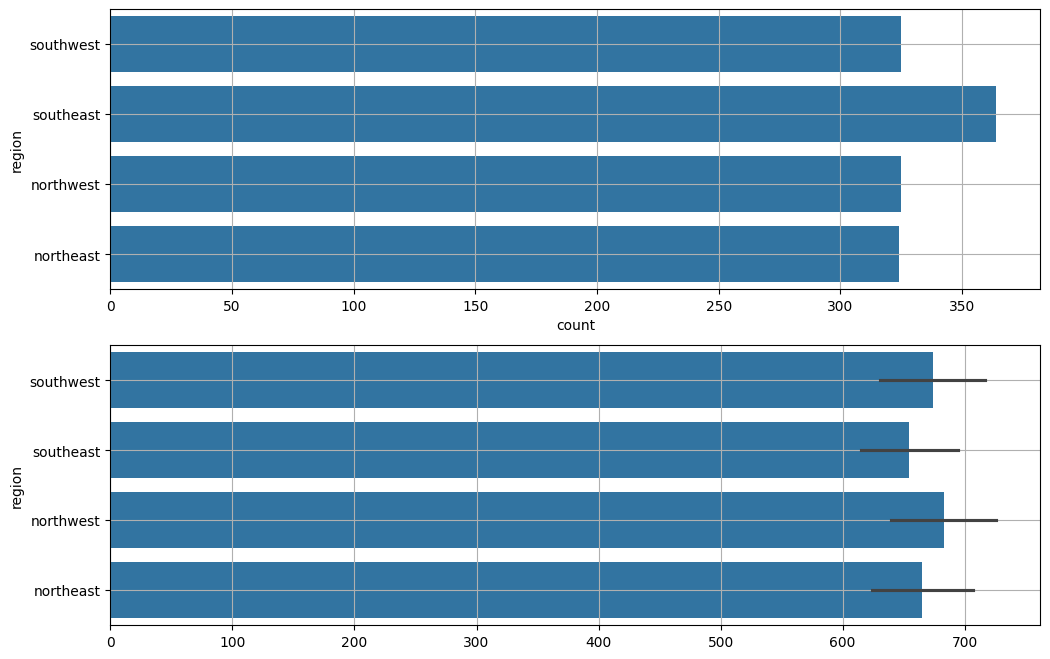

In [39]:
data_bar_value(data, 'region')

In [40]:
data[['region']].describe().T

,count,unique,top,freq
region,1338,4,southeast,364


## 3.두 변수의 관계 분석하기

* 분석할 내용
    * x --> y 가설에 대한 증거 찾기
        * 그래프, 가설검정 도구
    * 관계 정리하기 : 강한, 중간, 약한 관계

In [58]:
target = 'charges'

In [74]:
def xy_scatter(feature, target, data):
    plt.scatter(x=feature, y=target, data=data)
    print(spst.pearsonr(data[feature], data[target]))
    plt.show()

### (1) 수치형 X --> 수치형 Y

* 그래프 : 산점도
* 가설검정 : 상관분석

#### 1) age --> charges

In [75]:
feature = 'age'

PearsonRResult(statistic=0.29900819333064765, pvalue=4.886693331718192e-29)


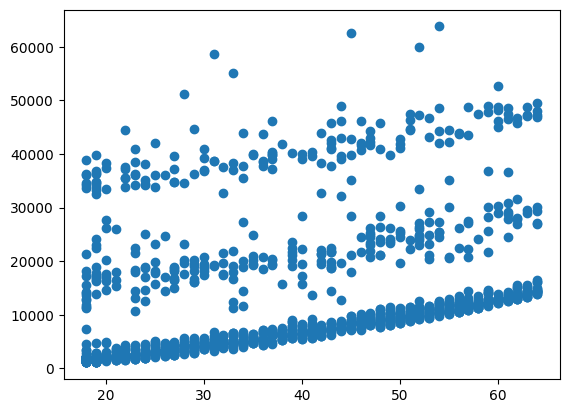

In [76]:
xy_scatter(feature, target, data)

#### 2) bmi --> charges

In [77]:
feature = 'bmi'

PearsonRResult(statistic=0.1983409688336289, pvalue=2.459085535116766e-13)


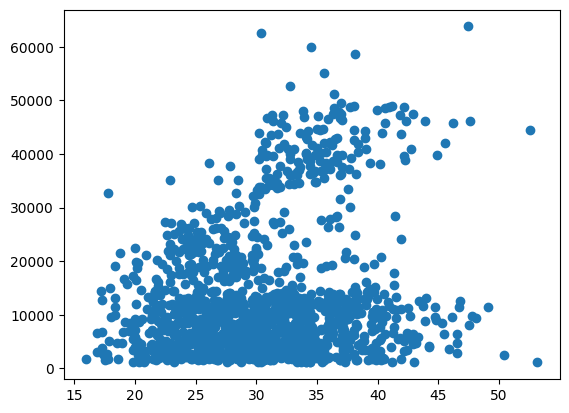

In [78]:
xy_scatter(feature, target, data)

#### 3) children --> charges

In [ ]:
feature = 'children'

PearsonRResult(statistic=0.1983409688336289, pvalue=2.459085535116766e-13)


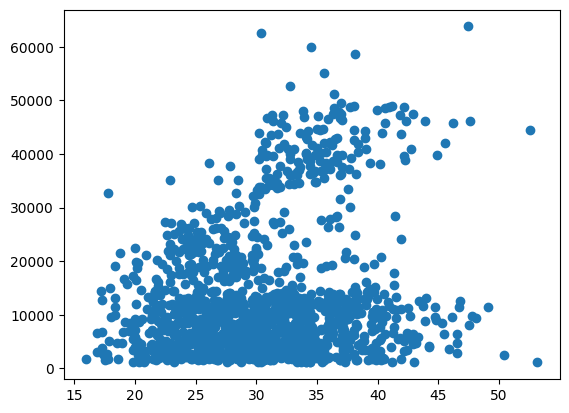

In [79]:
xy_scatter(feature, target, data)

### (2) 범주형 X --> 수치형 Y

* 그래프 : 평균비교 막대그래프 (sns.barplot)
* 가설검정 : 범주2 - t-test, 범주3개 이상 - 분산분석(anova)

In [87]:
def xy_barplot(feature, target, data):
    sns.barplot(x=feature, y=target, data=data)
    plt.show()

In [96]:
def xy_t_na(feature, target, g1, g2, data):
    feature_g1 = data.loc[data[feature]==g1, target]
    feature_g2 = data.loc[data[feature]==g2, target]
    con, p_value = spst.ttest_ind(feature_g1, feature_g2)
    print(f'상관계수: {con}, p_value: {p_value}')

#### 1) sex --> charges

In [88]:
feature = 'sex'

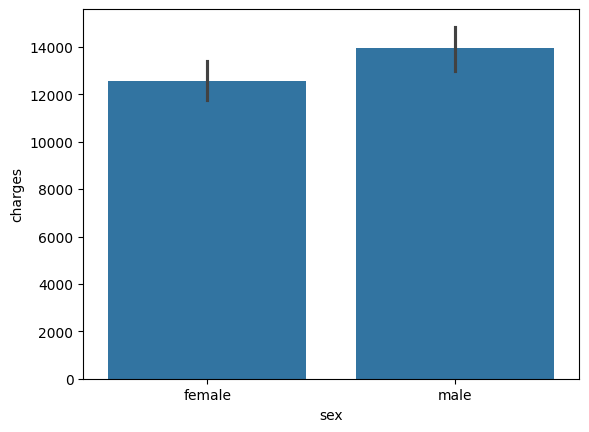

In [89]:
xy_barplot(feature, target, data)

In [98]:
xy_t_na(feature, target, 'male', 'female', data)

상관계수: 2.097546590051688, p_value: 0.03613272100592976


#### 2) smoker --> charges

In [99]:
feature = 'smoker'

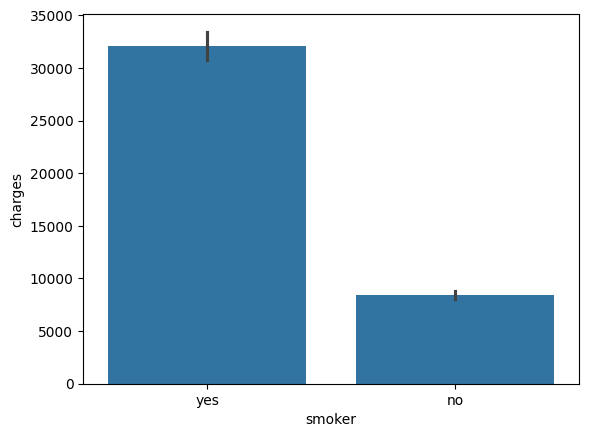

In [100]:
xy_barplot(feature, target, data)

In [101]:
xy_t_na(feature, target, 'yes', 'no', data)

상관계수: 46.66492117272371, p_value: 8.271435842179102e-283


#### 3) region --> charges

In [105]:
feature ='region'

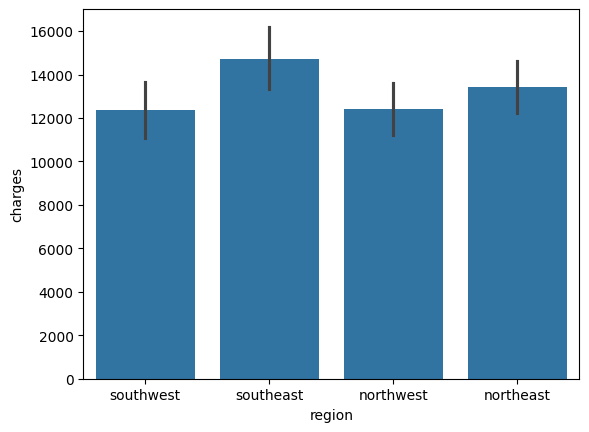

In [106]:
xy_barplot(feature, target, data)

In [107]:
g1 = data.loc[data[feature]=='southwest', 'charges']
g2 = data.loc[data[feature]=='southeast', 'charges']
g3 = data.loc[data[feature]=='northwest', 'charges']
g4 = data.loc[data[feature]=='northeast', 'charges']

In [109]:
a_v, p_value = spst.f_oneway(g1, g2, g3, g4)
print(f'상관계수: {a_v}, p_value: {p_value}')

상관계수: 2.96962669358912, p_value: 0.0308933560705201


### (3) 관계 정리하기

① 강한관계

In [ ]:
# scmoker


② 중간관계

In [ ]:
# sex

③ 관계없음

In [ ]:
# region